In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now to load the data from the dataset

In [2]:
df = pd.read_csv("datasets/public-perception-data.csv")

Now to explore the data

In [3]:
print(df.head())

     date                                            measure  proportion
0  Dec-14  Agree the police are dealing with the things t...        72.0
1  Dec-14  Agree the police can be relied upon to be ther...        77.0
2  Dec-14  Agree the police listen to the concerns of loc...        74.0
3  Dec-14  Agree the police treat everyone fairly regardl...        74.0
4  Dec-14  Feels well informed about local police activit...        49.0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        245 non-null    object 
 1   measure     245 non-null    object 
 2   proportion  245 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.9+ KB
None


In [5]:
print(df.describe())

       proportion
count  245.000000
mean    58.906122
std     16.980563
min     12.000000
25%     48.000000
50%     64.000000
75%     72.000000
max     79.000000


Time to clean up the database and remove any empty records

In [6]:
df.dropna(inplace=True)
print(df.describe())

       proportion
count  245.000000
mean    58.906122
std     16.980563
min     12.000000
25%     48.000000
50%     64.000000
75%     72.000000
max     79.000000


I will now attempt to visualize the data for a better understanding

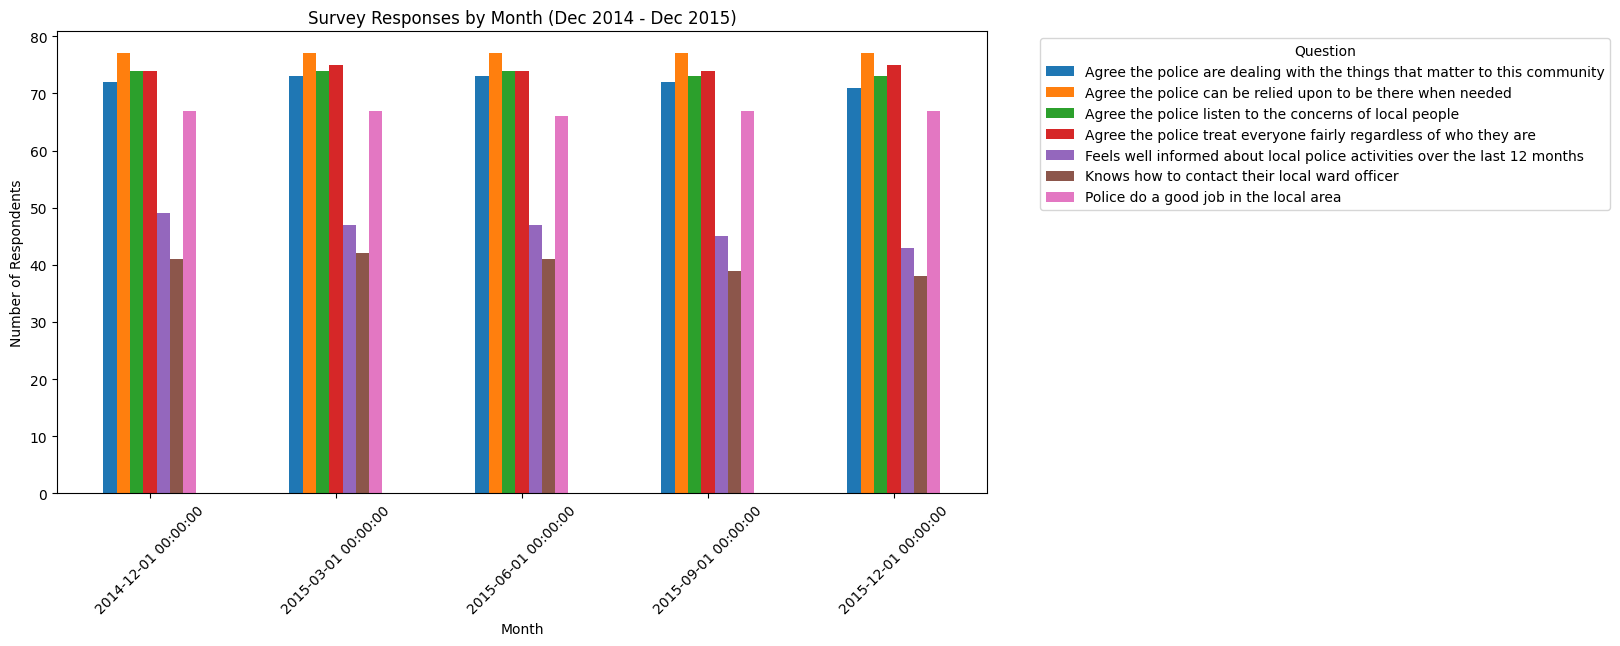

In [15]:
# Convert Date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%b-%y')

# Filter data for December 2014 to December 2015
filtered_data = df[(df['date'] >= '2014-12-01') & (df['date'] <= '2015-12-31')]

# Group data by month and measure, then sum the proportions
grouped_data = filtered_data.groupby(['date', 'measure'])['proportion'].sum().unstack()

# Plot grouped bar chart
grouped_data.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Number of Respondents')
plt.title('Survey Responses by Month (Dec 2014 - Dec 2015)')
plt.xticks(rotation=45)
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

By using a grouped bar chart it allows us to visualise the yearly data much more comfortably.
We can identify that during 2014 - 2015 the public opinion didnt change very much.

Now to take a look at the other years results.

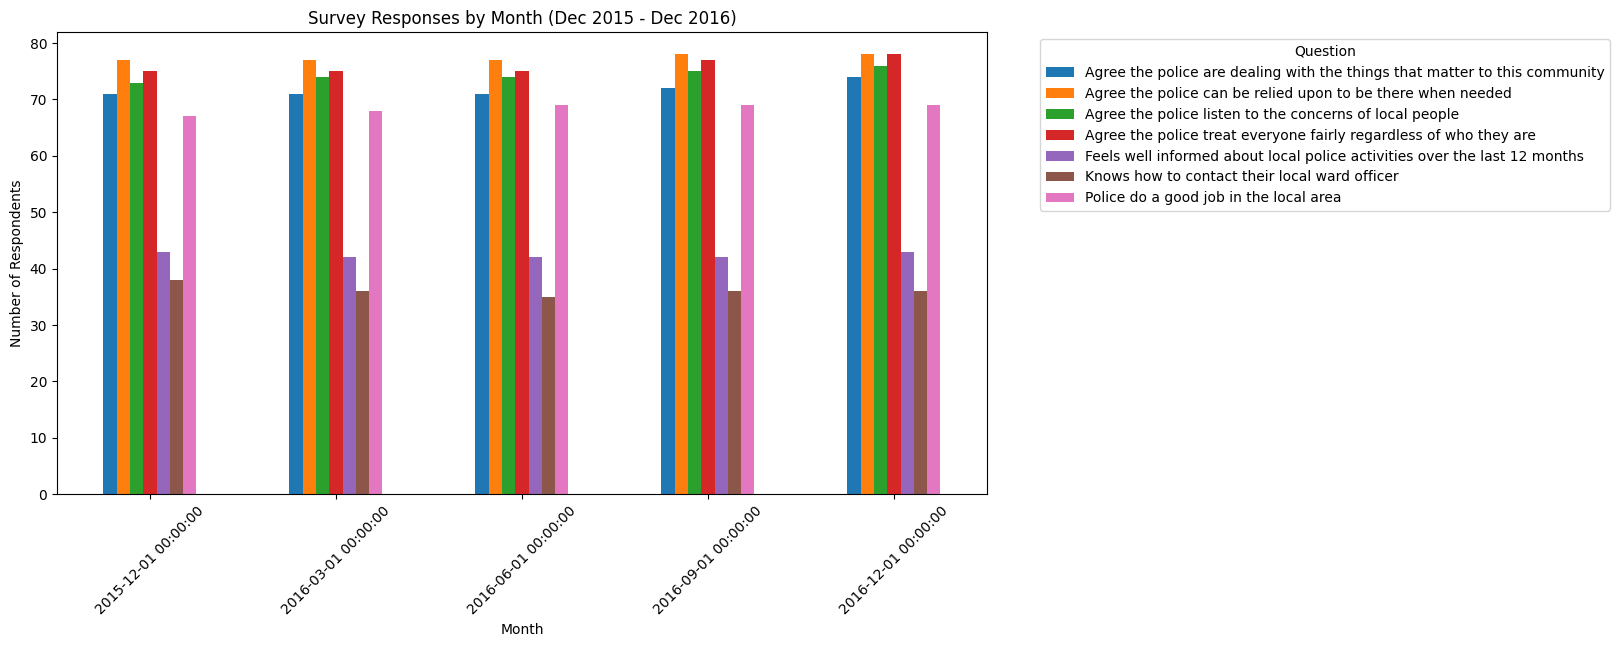

In [17]:
filtered_data = df[(df['date'] >= '2015-12-01') & (df['date'] <= '2016-12-31')]

grouped_data = filtered_data.groupby(['date', 'measure'])['proportion'].sum().unstack()

grouped_data.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Number of Respondents")
plt.title('Survey Responses by Month (Dec 2015 - Dec 2016)')
plt.xticks(rotation=45)
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Not much has changed with this new data. We can identify that there are less respondents than the previous year
but ratio between question results are similar.

Now to check the next years